In [1]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt

myD=pd.read_csv("Value_of_Energy_Cost_Savings_Program_Savings_for_Businesses_-_FY2020.csv")

c1=myD.columns;
print("%d companies are present in the data!"%(len(myD['Company Name'].unique())))

439 companies are present in the data!


In [2]:
n=len(myD[c1[1]])
DQ_JC=myD[myD['City']=="Queens"]['Job created'].sum()
print("There are %d jobs created in Queens!"%(DQ_JC))

There are 90 jobs created in Queens!


In [3]:
EMD=len(myD['company email'].unique())
print("There are %d different email domain set!"%(EMD))

There are 421 different email domain set!


In [4]:
NTAU=myD['NTA'].value_counts(dropna=False)
Q=[NTAU[x] for x in myD['NTA']]
myD.insert(len(c1),"NTA_count",Q)
NTAplus=myD[myD["NTA_count"]>=5]

In [5]:
TSM=NTAplus.groupby('NTA')['Total Savings'].mean()
print("Average total saving:\n",TSM)

Average total saving:
 NTA
Battery Park City-Lower Manhattan                   469890.796667
Bushwick South                                       26140.455000
Carroll Gardens-Columbia Street-Red Hook             24337.390000
College Point                                        17159.372857
Crown Heights North                                   4036.298889
DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill     59950.340000
East New York                                        48433.093333
East Williamsburg                                    13990.626364
Greenpoint                                            9753.649286
Hunters Point-Sunnyside-West Maspeth                 23931.398933
Hunts Point                                          39246.016154
Manhattanville                                        2760.888889
Maspeth                                               6658.283333
Mott Haven-Port Morris                               17843.937857
Queensbridge-Ravenswood-Long Island City         

In [6]:
JCM=NTAplus.groupby('NTA')['Job created'].mean().fillna(0)
print("Average total jobs created:\n",JCM)

Average total jobs created:
 NTA
Battery Park City-Lower Manhattan                    0.000000
Bushwick South                                      10.000000
Carroll Gardens-Columbia Street-Red Hook             0.000000
College Point                                        2.000000
Crown Heights North                                  0.000000
DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill     0.000000
East New York                                       15.000000
East Williamsburg                                    0.000000
Greenpoint                                           0.000000
Hunters Point-Sunnyside-West Maspeth                 0.000000
Hunts Point                                         12.000000
Manhattanville                                       0.000000
Maspeth                                             10.000000
Mott Haven-Port Morris                               3.333333
Queensbridge-Ravenswood-Long Island City             0.000000
SoHo-TriBeCa-Civic Center-Little Ital

In [7]:
with open("output.csv",'w') as file:
    csv.writer(file).writerow("%d companies are present in the data!"%(len(myD['Company Name'].unique())))
    csv.writer(file).writerow("There are %d jobs created in Queens!"%(DQ_JC))
    csv.writer(file).writerow("There are %d different email domain set!"%(EMD))
    csv.writer(file).writerow("average total savings for each NTA with at least 5 listed businesses:")
    csv.writer(file).writerow(TSM)
    csv.writer(file).writerow("average total jobs created for each NTA with at least 5 listed businesses:")
    csv.writer(file).writerow(JCM)

In [8]:
# scatter plot of jobs created versus average savings. Use both a standard and a logarithmic scale for the average savings.

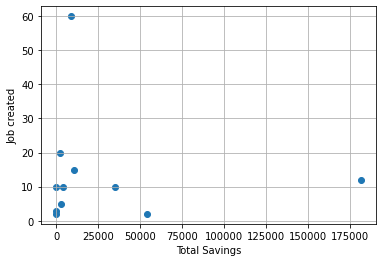

In [9]:
y=np.array(myD['Job created']).reshape((n,1))
x=np.array(myD['Total Savings']).reshape((n,1))
plt.scatter(x,y)
plt.yscale('linear')
plt.xscale('linear')
plt.xlabel('Total Savings')
plt.ylabel('Job created')
plt.grid('on')

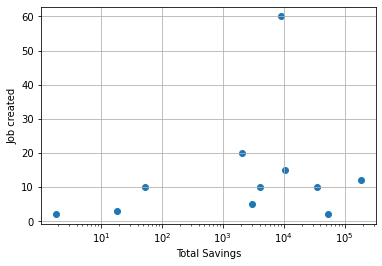

In [10]:
y=np.array(myD['Job created']).reshape((n,1))
x=np.array(myD['Total Savings']).reshape((n,1))
plt.scatter(x,y)
plt.yscale('linear')
plt.xscale('log')
plt.xlabel('Total Savings')
plt.ylabel('Job created')
plt.grid('on')

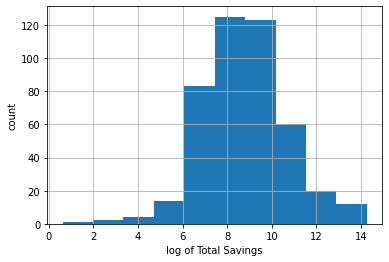

In [11]:
m=x[x>0]
m=np.log(m)
#plt.hist(x,log=True)
plt.hist(m)
plt.xlabel('log of Total Savings')
plt.ylabel('count')
plt.grid('on')

In [12]:
date_a=np.array(myD['Effective Date']).reshape((n,1))
mnt=[x[0][0:2] for x in date_a]
yr=[x[0][-4:] for x in date_a]
myD.insert(len(c1)+1,"month",mnt)
myD.insert(len(c1)+2,"year",yr)
#JCM_date=np.array(myD.groupby(['month','year'])['Job created'].sum())
#myD.groupby(['month'])["Job created"].sum().plot()


Text(0, 0.5, 'Job created')

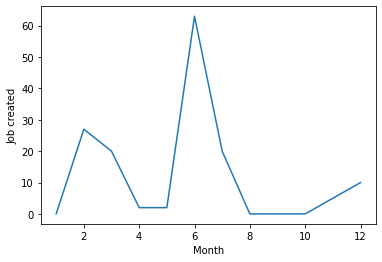

In [13]:
JCM_date=np.array(myD.groupby(['month'])['Job created'].sum())
plt.plot(np.arange(1,13),JCM_date)
plt.xlabel('Month')
plt.ylabel('Job created')